# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [2]:
#!pip install matplotlib
#!pip install seaborn
#!pip install scikit-learn



#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

<function matplotlib.pyplot.show(close=None, block=None)>

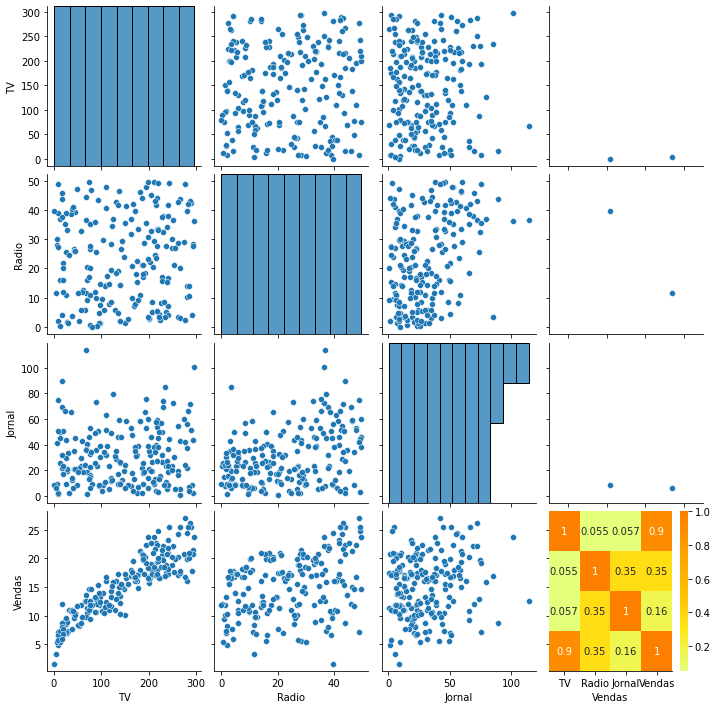

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


tabela = pd.read_csv("advertising.csv")
#display(tabela)


#criar o gráfico
sns.pairplot(tabela)
#exibir o gráfico
plt.show

#criar o gráfico
sns.heatmap(tabela.corr(), cmap="Wistia", annot=True)
#exibir o gráfico
plt.show

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [ ]:
from sklearn.model_selection import train_test_split

# separar os dados em x e y
y = tabela ["Vendas"]
x = tabela [["TV", "Jornal", "Radio"]]

#separar valores de teste e de treino
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)



#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [11]:
#importa a regressão linear
from sklearn.linear_model import LinearRegression
#importa a árvore de decisão
from sklearn.ensemble import RandomForestRegressor


# cria a inteligência
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()


#treina no simulado
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_teste, y_teste)

#testa na prova pra ver se aprendeu


RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [14]:
from sklearn.metrics import r2_score

#cria as previsões
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

# compara as previsoes com o gabarito
print(f"{r2_score(y_teste, previsao_regressaolinear):.1%}")

#com formatação em %
print(r2_score(y_teste, previsao_arvoredecisao))

91.5%
0.9870604790143187


#### Visualização Gráfica das Previsões

In [ ]:
# o melhor modelo é o de árvore de decisão

#### Como fazer uma nova previsão?

In [16]:
#novas previsões importando a outra planilha disponibilizada "novos.csv"

novos_valores = pd.read_csv("novos.csv")
display(novos_valores)
nova_previsao = modelo_arvoredecisao.predict(novos_valores)
display(nova_previsao)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([ 7.631,  9.498, 16.011])